In [1]:
import numpy as np
import scipy.stats as sps
from gaussian_mixture_anomaly_detection import GaussianMixtureInTimeAnomalyDetector
import matplotlib.pyplot as plt
%matplotlib inline

простой пример: 10 двумерных временных рядов по 10 элементов в каждом,лежащие на 3x=2y со случайным нормальным смещением, а также 4 аномальные точки

In [15]:
T = 10
F = 10
N = 2

data = np.zeros((F, T, N))

for i in range(F):
    for t in range(T):
        data[i][t] = np.array([2,3]) * t + sps.norm.rvs(size=2,scale=0.5)
        
anomalies = [(0,5,0), (1,3,1), (2,8,1), (3,2,0)]
for a in anomalies:
    data[a[0]][a[1]][a[2]] += 5

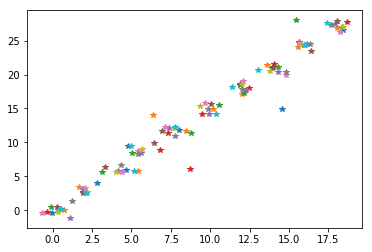

In [16]:
for i in range(F):
    plt.plot(data[i][:, 0], data[i][:, 1], '*')

In [17]:
detector = GaussianMixtureInTimeAnomalyDetector(n_components=10, random_state=1)

In [18]:
scores = detector.fit(data)  # scores  - лограифмическое правдоподобие нормальности для каждого сэмпла

выявление аномальных сэмплов:

In [19]:
detector.find_anomalies(scores, log_likelihood_threshold=0)

([(-7.9111426127627267, (0, 5)),
  (-6.3076031127215693, (3, 2)),
  (-5.0561068638476803, (1, 3)),
  (-2.8759557622976724, (7, 1)),
  (-2.1142534718837958, (2, 8)),
  (-1.3370700050697382, (0, 1))],
 0)

In [20]:
detector.find_anomalies(scores, anomaly_top=0.05)

([(-7.9111426127627267, (0, 5)),
  (-6.3076031127215693, (3, 2)),
  (-5.0561068638476803, (1, 3)),
  (-2.8759557622976724, (7, 1)),
  (-2.1142534718837958, (2, 8)),
  (-1.3370700050697382, (0, 1))],
 -1.3370700050697382)

как видно аномалии попали в топ 5%

In [21]:
detector.find_anomalies(scores, anomaly_top=0.1, strategy='series')

([(11.263382203890698, 0), (15.026747514527345, 3)], 15.026747514527345)

2 ряда с добавленными аномалиями попали в топ по сумме логорифимических правдоподобий

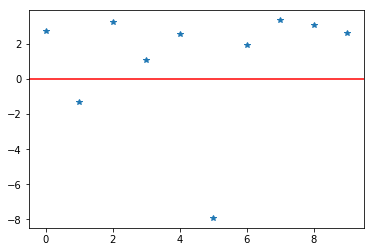

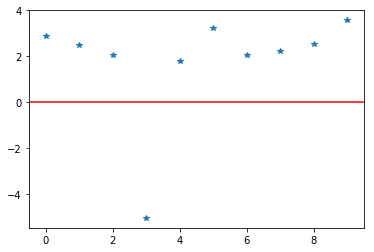

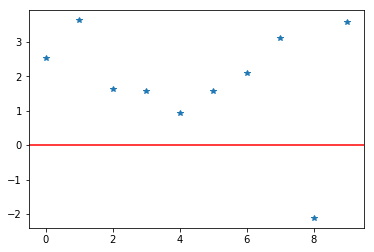

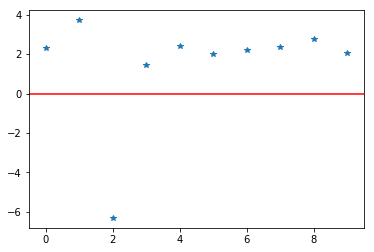

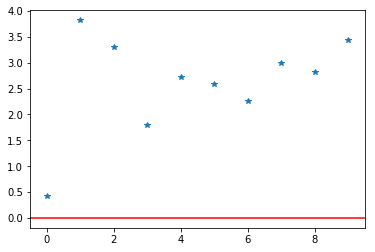

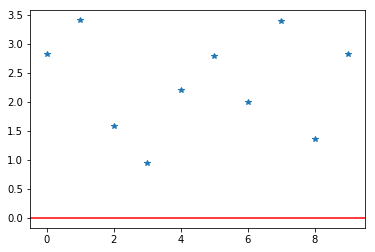

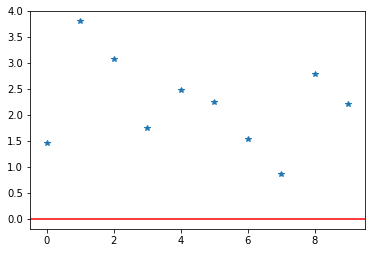

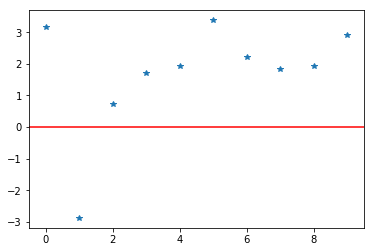

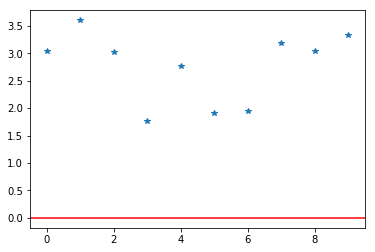

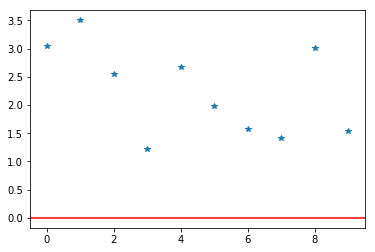

In [22]:
for f in range(F):
    plt.plot(range(T), scores[f],'*')
    plt.plot([-1, 10], [0,0],'r')
    plt.xlim([-0.5, 9.5])
    plt.show()

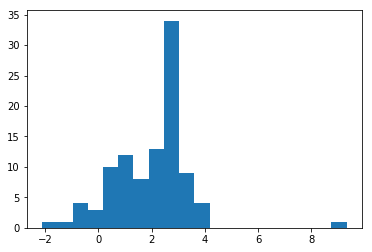

In [10]:
plt.hist(scores.reshape(-1), bins=20)
plt.show()

In [11]:
clusters = np.zeros((T, F))
for f in range(F):
    for t in range(T):
        clusters[t][f] =np.argmax([detector._GaussianMixtureInTimeAnomalyDetector__p_cluster_sample[i][t][f]
                                    for i in range(10)])

clusters

array([[ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 4.,  2.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
       [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  6.,  9.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]])